In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Import for splitting data
from sklearn.preprocessing import StandardScaler # Import for feature scaling
from sklearn.linear_model import LinearRegression, Lasso, Ridge # Imports for initial models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # Imports for initial models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Imports for evaluation metrics
from sklearn.model_selection import GridSearchCV # Import for hyperparameter tuning (GridSearchCV)


!pip install mygene
import mygene # Import mygene for gene symbol conversion

# For GPU-accelerated XGBoost
!pip install xgboost # Install XGBoost
from xgboost import XGBRegressor # Import XGBoost Regressor

# --- 1. Mount Google Drive ---
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive mounted.")

# --- 2. Define File Paths ---
gtex_tpm_path = '/content/drive/MyDrive/age_pediction/data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct'
gtex_sample_attributes_path = '/content/drive/MyDrive/age_pediction/data/GTEx_Analysis_v8_Annotations_SampleAttributesDS.tsv'
gtex_subject_phenotypes_path = '/content/drive/MyDrive/age_pediction/data/GTEx_Analysis_v8_Annotations_SubjectPhenotypesDS.tsv'

print("File paths defined.")



Mounted at /content/drive
Google Drive mounted.
File paths defined.



Loading sample attributes from: /content/drive/MyDrive/age_pediction/data/GTEx_Analysis_v8_Annotations_SampleAttributesDS.tsv
Sample attributes loaded successfully!
Shape of sample attributes: (22951, 63)
Sample attributes columns: ['SAMPID', 'SMATSSCR', 'SMCENTER', 'SMPTHNTS', 'SMRIN', 'SMTS', 'SMTSD', 'SMUBRID', 'SMTSISCH', 'SMTSPAX', 'SMNABTCH', 'SMNABTCHT', 'SMNABTCHD', 'SMGEBTCH', 'SMGEBTCHD', 'SMGEBTCHT', 'SMAFRZE', 'SMGTC', 'SME2MPRT', 'SMCHMPRS', 'SMNTRART', 'SMNUMGPS', 'SMMAPRT', 'SMEXNCRT', 'SM550NRM', 'SMGNSDTC', 'SMUNMPRT', 'SM350NRM', 'SMRDLGTH', 'SMMNCPB', 'SME1MMRT', 'SMSFLGTH', 'SMESTLBS', 'SMMPPD', 'SMNTERRT', 'SMRRNANM', 'SMRDTTL', 'SMVQCFL', 'SMMNCV', 'SMTRSCPT', 'SMMPPDPR', 'SMCGLGTH', 'SMGAPPCT', 'SMUNPDRD', 'SMNTRNRT', 'SMMPUNRT', 'SMEXPEFF', 'SMMPPDUN', 'SME2MMRT', 'SME2ANTI', 'SMALTALG', 'SME2SNSE', 'SMMFLGTH', 'SME1ANTI', 'SMSPLTRD', 'SMBSMMRT', 'SME1SNSE', 'SME1PCTS', 'SMRRNART', 'SME1MPRT', 'SMNUM5CD', 'SMDPMPRT', 'SME2PCTS']

Loading subject phenotypes from

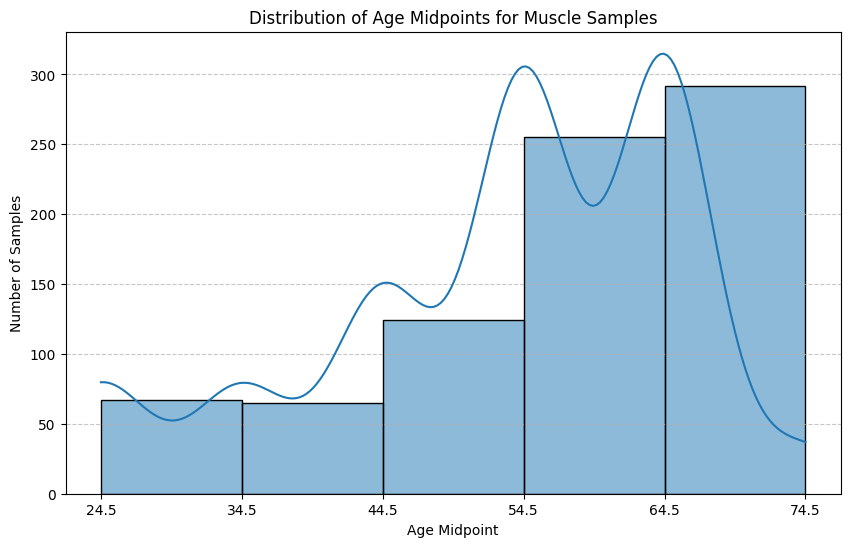


--- Visualizing Expression Distribution of a few Genes ---


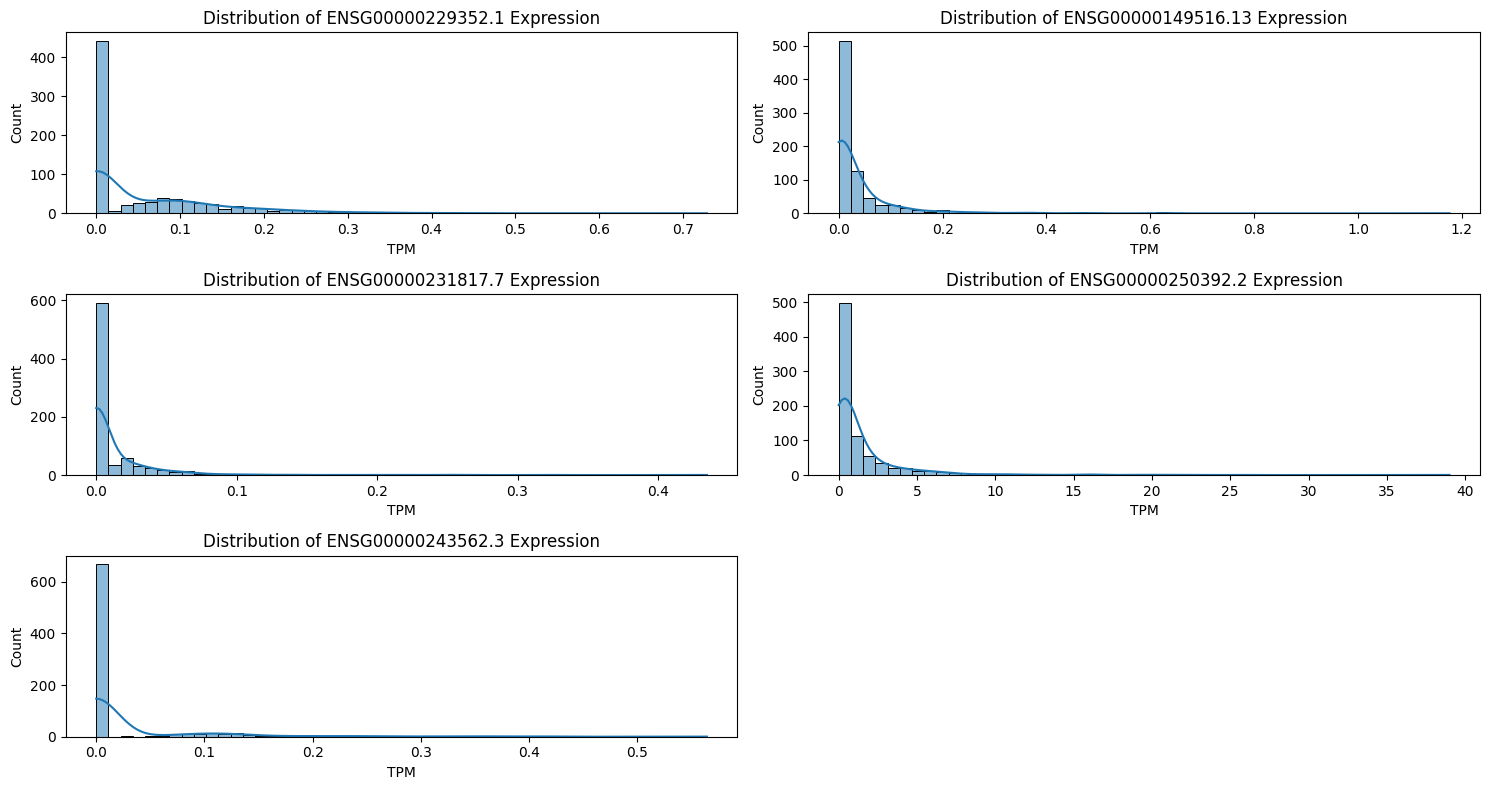


--- Data Preparation Complete. Ready for ML! ---

--- Starting Machine Learning Model Development ---

--- Data Splitting ---
Shape of X_train: (642, 56200)
Shape of X_test: (161, 56200)
Shape of y_train: (642,)
Shape of y_test: (161,)

--- Feature Scaling ---
Features scaled successfully.
Shape of X_train_scaled: (642, 56200)
Shape of X_test_scaled: (161, 56200)
First 5 rows of X_train_scaled (check for scaling - values centered around 0):
     ENSG00000223972.5  ENSG00000227232.5  ENSG00000278267.1  \
432           1.223807           2.161792          -0.107231   
582           3.222974          -1.040239          -0.107231   
442           2.330154           1.643454          -0.107231   
643          -0.546995           2.509677          -0.107231   
334          -0.546995           0.037604          -0.107231   

     ENSG00000243485.5  ENSG00000237613.2  ENSG00000268020.3  \
432          -0.448671           1.530637          -0.731575   
582           1.938004          -0.493041

/usr/local/lib/python3.11/dist-packages/scipy/_lib/_util.py:1226: LinAlgWarning: Ill-conditioned matrix (rcond=5.09229e-08): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Ridge Regression trained.
Training Random Forest Regressor...
Random Forest Regressor trained.
Training Gradient Boosting Regressor...
Gradient Boosting Regressor trained.

All initial models trained successfully!
Next, we will evaluate these models and perform biomarker discovery.

--- Model Evaluation ---

Evaluating Linear Regression...
  MAE: 7.95
  RMSE: 9.84
  R-squared: 0.46

Evaluating Lasso Regression...
  MAE: 7.21
  RMSE: 8.96
  R-squared: 0.55

Evaluating Ridge Regression...
  MAE: 7.95
  RMSE: 9.84
  R-squared: 0.46

Evaluating Random Forest Regressor...
  MAE: 8.19
  RMSE: 9.84
  R-squared: 0.46

Evaluating Gradient Boosting Regressor...
  MAE: 7.21
  RMSE: 8.61
  R-squared: 0.59

--- Summary of Model Performance on Test Set ---
                                  MAE      RMSE        R2
Model                                                    
Linear Regression            7.948998  9.835664  0.460730
Lasso Regression             7.211355  8.962956  0.552182
Ridge Regressio

In [3]:
# --- 3. Load Sample Attributes Metadata ---
print(f"\nLoading sample attributes from: {gtex_sample_attributes_path}")
df_sample_attributes = pd.read_csv(gtex_sample_attributes_path, sep='\t')
print("Sample attributes loaded successfully!")
print(f"Shape of sample attributes: {df_sample_attributes.shape}")
print("Sample attributes columns:", df_sample_attributes.columns.tolist())


# --- 4. Load Subject Phenotypes Metadata ---
print(f"\nLoading subject phenotypes from: {gtex_subject_phenotypes_path}")
df_subject_phenotypes = pd.read_csv(gtex_subject_phenotypes_path, sep='\t')
print("Subject phenotypes loaded successfully!")
print(f"Shape of subject phenotypes: {df_subject_phenotypes.shape}")
print("Subject phenotypes columns:", df_subject_phenotypes.columns.tolist())


# --- 5. Process Subject Phenotypes for Age ---
try:
    df_subject_phenotypes_processed = df_subject_phenotypes[['SUBJID', 'AGE']].copy()
except KeyError as e:
    print(f"\nCRITICAL ERROR: 'SUBJID' or 'AGE' columns are still not found in subject phenotypes.")
    print(f"The columns in df_subject_phenotypes are: {df_subject_phenotypes.columns.tolist()}")
    raise e

def convert_age_bin_to_midpoint(age_bin):
    if pd.isna(age_bin):
        return np.nan
    try:
        start, end = map(int, str(age_bin).split('-'))
        return (start + end) / 2
    except ValueError:
        return float(age_bin)

df_subject_phenotypes_processed['AGE_MIDPOINT'] = df_subject_phenotypes_processed['AGE'].apply(convert_age_bin_to_midpoint)
df_subject_phenotypes_processed.dropna(subset=['AGE_MIDPOINT'], inplace=True)

print("\nProcessed Subject Phenotypes (Subject ID and Age Midpoint):")
print(df_subject_phenotypes_processed.head())
print(f"Number of subjects with age data: {df_subject_phenotypes_processed.shape[0]}")


In [ ]:
# --- 6. Select Specific Tissue Samples ---(I selected muscle, we can choose any, considering which tissue is most impacted by aging)
selected_tissue = 'Muscle'

if 'SMTS' not in df_sample_attributes.columns:
    print(f"\nCRITICAL ERROR: 'SMTS' column not found in Sample Attributes.")
    print(f"The columns in df_sample_attributes are: {df_sample_attributes.columns.tolist()}")
    raise KeyError("'SMTS' column missing in sample attributes.")

df_tissue_samples = df_sample_attributes[df_sample_attributes['SMTS'] == selected_tissue].copy()
print(f"\nFiltered for samples in tissue: '{selected_tissue}'")
print(f"Number of samples in '{selected_tissue}': {df_tissue_samples.shape[0]}")
print(df_tissue_samples.head())

if 'SAMPID' not in df_tissue_samples.columns:
    print(f"\nCRITICAL ERROR: 'SAMPID' column not found in filtered Sample Attributes.")
    print(f"The columns in df_tissue_samples are: {df_tissue_samples.columns.tolist()}")
    raise KeyError("'SAMPID' column missing in filtered sample attributes.")

target_samp_ids = df_tissue_samples['SAMPID'].tolist()
print(f"\nExtracted {len(target_samp_ids)} sample IDs for '{selected_tissue}'.")


# --- 7. Define Function for Optimized Gene Expression Data Loading ---
def read_gct_file_optimized_memory(file_path, sample_ids_to_load=None):
    with open(file_path, 'r') as f:
        f.readline() # Skip #1.2
        dimensions = f.readline().strip().split('\t')
        num_genes = int(dimensions[0])
        total_samples_in_file = int(dimensions[1])

        header_line = f.readline().strip().split('\t')
        all_file_sample_ids = header_line[2:]

        cols_to_load_indices = [0, 1] # Always load 'gene_id' (col 0) and 'gene_description' (col 1)
        loaded_sample_ids = []

        if sample_ids_to_load:
            sample_indices_map = {sample_id: i + 2 for i, sample_id in enumerate(all_file_sample_ids)}
            for sid in sample_ids_to_load:
                if sid in sample_indices_map:
                    cols_to_load_indices.append(sample_indices_map[sid])
                    loaded_sample_ids.append(sid)
            print(f"Identified {len(loaded_sample_ids)} columns for selected samples.")
            if len(loaded_sample_ids) == 0:
                print("WARNING: No matching sample IDs found to load from the GCT file for the selected tissue. This might lead to an empty expression DataFrame.")
        else:
            cols_to_load_indices = list(range(total_samples_in_file + 2))
            loaded_sample_ids = all_file_sample_ids
            print(f"Loading all {total_samples_in_file} sample columns.")

    df = pd.read_csv(file_path, sep='\t', skiprows=3, header=None,
                     usecols=cols_to_load_indices)

    final_column_names = ['gene_id', 'gene_description']
    original_sample_id_map = {i + 2: s_id for i, s_id in enumerate(all_file_sample_ids)}
    for col_idx in cols_to_load_indices[2:]:
        final_column_names.append(original_sample_id_map[col_idx])
    df.columns = final_column_names

    df.set_index('gene_id', inplace=True)
    df.drop(columns=['gene_description'], inplace=True, errors='ignore')

    expression_cols = [col for col in df.columns if col in loaded_sample_ids]
    if expression_cols:
        df[expression_cols] = df[expression_cols].astype(np.float32)
    else:
        print("WARNING: No expression columns found to convert to float32. DataFrame might be empty or malformed.")

    return df

# --- 8. Load Gene Expression Data Selectively ---
print(f"\nLoading gene expression data selectively for '{selected_tissue}' from: {gtex_tpm_path}")
df_expression = read_gct_file_optimized_memory(gtex_tpm_path, sample_ids_to_load=target_samp_ids)
print("Gene expression data loaded successfully!")
print(f"Shape of expression data (selected tissue): {df_expression.shape}")
print(df_expression.head())


# --- 9. Final Merging of Expression Data with Metadata ---
df_expression_T = df_expression.T
df_expression_T.index.name = 'SAMPID'

print("\nTransposed expression data (samples as rows, genes as columns):")
print(df_expression_T.head())
print(f"Shape after transpose: {df_expression_T.shape}")

df_expression_T['SUBJID'] = df_expression_T.index.str.split('-').str[0:2].str.join('-')
print("\ndf_expression_T with new 'SUBJID' column:")
print(df_expression_T[['SUBJID']].head())

df_merged_expr_sample_subj = pd.merge(df_expression_T.reset_index(), # SAMPID becomes a column
                                      df_tissue_samples[['SAMPID', 'SMTS']], # Select relevant columns from df_tissue_samples
                                      on='SAMPID',
                                      how='inner')

print("\nMerged expression data with Sample IDs and Tissue Types:")
print(df_merged_expr_sample_subj.head())
print(f"Shape after merging with sample attributes: {df_merged_expr_sample_subj.shape}")

df_final_data = pd.merge(df_merged_expr_sample_subj,
                         df_subject_phenotypes_processed[['SUBJID', 'AGE_MIDPOINT']],
                         on='SUBJID',
                         how='inner')

print("\nFinal Merged data (Expression + Sample Info + Age) for selected tissue:")
print(df_final_data.head())
print(f"Shape of final merged data: {df_final_data.shape}")


In [ ]:
# --- 10. Separate Features (X) and Target (y) ---
X = df_final_data.drop(columns=['SAMPID', 'SUBJID', 'SMTS', 'AGE_MIDPOINT'])
y = df_final_data['AGE_MIDPOINT']

print(f"\nFinal Shape of Features (X) for ML: {X.shape}")
print(f"Final Shape of Target (y) for ML: {y.shape}")
print("\nFirst 5 rows of X (features - gene expression):")
print(X.head())
print("\nFirst 5 values of y (target - age):")
print(y.head())

# --- 11. Final Checks ---
print(f"\nNaNs in X after final processing: {X.isnull().sum().sum()}")
print(f"NaNs in y after final processing: {y.isnull().sum()}")

print("\nAge distribution in selected tissue samples:")
print(y.value_counts().sort_index())

# --- 12. Visualizations for X and y ---

print("\n--- Visualizing Age Distribution ---")
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, bins=sorted(y.unique()))
plt.title(f'Distribution of Age Midpoints for {selected_tissue} Samples')
plt.xlabel('Age Midpoint')
plt.ylabel('Number of Samples')
plt.xticks(sorted(y.unique()))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n--- Visualizing Expression Distribution of a few Genes ---")
num_random_genes = 5
random_genes = X.sample(n=num_random_genes, axis=1, random_state=42).columns

plt.figure(figsize=(15, 8))
num_rows = (num_random_genes + 1) // 2
num_cols = 2
if num_random_genes == 1:
    num_rows = 1
    num_cols = 1
elif num_random_genes % 2 != 0:
    num_cols = 2

for i, gene in enumerate(random_genes):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(X[gene], kde=True, bins=50)
    plt.title(f'Distribution of {gene} Expression')
    plt.xlabel('TPM')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

print("\n--- Data Preparation Complete. Ready for ML! ---")

In [ ]:
# --- Machine Learning Model Development ---

print("\n--- Starting Machine Learning Model Development ---")

# --- 13. Data Splitting (Training and Testing Sets) ---
print("\n--- Data Splitting ---")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


# --- 14. Feature Scaling ---
print("\n--- Feature Scaling ---")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Features scaled successfully.")
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")
print("First 5 rows of X_train_scaled (check for scaling - values centered around 0):")
print(X_train_scaled.head())


# --- 15. Initial Model Training ---
print("\n--- Initial Model Training ---")

models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(random_state=42, max_iter=2000),
    'Ridge Regression': Ridge(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42, n_jobs=-1),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

trained_models = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    print(f"{name} trained.")

print("\nAll initial models trained successfully!")
print("Next, we will evaluate these models and perform biomarker discovery.")

# --- 16. Model Evaluation ---
print("\n--- Model Evaluation ---")

evaluation_results = {}

for name, model in trained_models.items():
    print(f"\nEvaluating {name}...")
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    evaluation_results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}

    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R-squared: {r2:.2f}")

df_results = pd.DataFrame(evaluation_results).T
df_results.index.name = 'Model'
print("\n--- Summary of Model Performance on Test Set ---")
print(df_results)

print("\nModel evaluation complete. Next, we will proceed with biomarker discovery.")

In [4]:
# --- 17. Biomarker Discovery (Feature Importance) ---
print("\n--- Biomarker Discovery ---")

# Access the trained Gradient Boosting model
gb_model = trained_models['Gradient Boosting Regressor']
# Extract feature importances and convert to a pandas Series, indexed by gene names (X.columns)
gb_feature_importances = pd.Series(gb_model.feature_importances_, index=X.columns)
# Select the top 50 genes based on Gradient Boosting importance
top_n_gb_genes = gb_feature_importances.nlargest(50)
print("\nTop Genes by Gradient Boosting Regressor Feature Importance:")
print(top_n_gb_genes)

# Access the trained Lasso Regression model
lasso_model = trained_models['Lasso Regression']
# FIX: Correctly extract Lasso coefficients from the trained model first
lasso_coefficients = pd.Series(lasso_model.coef_, index=X.columns)
# Filter for non-zero coefficients (Lasso's feature selection)
# Then sort by absolute value in descending order
non_zero_lasso_genes = lasso_coefficients[lasso_coefficients != 0].sort_values(key=abs, ascending=False)
# Select the top 50 non-zero coefficient genes from Lasso
top_n_lasso_genes = non_zero_lasso_genes.head(50)
print("\nTop Genes by Lasso Regression Coefficients (Non-zero):")
print(top_n_lasso_genes)


--- Biomarker Discovery ---

Top Genes by Gradient Boosting Regressor Feature Importance:
ENSG00000148468.16    0.071552
ENSG00000174473.15    0.063425
ENSG00000228526.6     0.062536
ENSG00000147889.17    0.047367
ENSG00000131080.14    0.045774
ENSG00000137766.16    0.035556
ENSG00000116329.10    0.034010
ENSG00000274750.2     0.021583
ENSG00000206195.10    0.017847
ENSG00000223553.6     0.015600
ENSG00000005020.12    0.013965
ENSG00000104368.17    0.013031
ENSG00000159212.12    0.012752
ENSG00000237181.1     0.012632
ENSG00000132432.13    0.012500
ENSG00000147231.13    0.011823
ENSG00000255310.2     0.011688
ENSG00000218336.8     0.011012
ENSG00000183631.4     0.010777
ENSG00000124635.8     0.010469
ENSG00000260047.2     0.010237
ENSG00000244306.10    0.010071
ENSG00000169306.9     0.009448
ENSG00000168702.17    0.009187
ENSG00000173253.15    0.008471
ENSG00000115073.7     0.007970
ENSG00000163395.16    0.007243
ENSG00000105711.11    0.006909
ENSG00000240764.3     0.006512
ENSG000002

In [5]:
# --- 18. Optimize Gene Symbol Conversion and Create Downloadable Table ---

print("\n--- Optimizing Gene Symbol Conversion and Creating Table ---")

# Step 1: Install mygene library (if not already installed)
# You need to run this command in a separate cell or at the top of your notebook once
# !pip install mygene
print("Ensure 'mygene' library is installed. If not, run '!pip install mygene' in a separate cell.")

# Make sure mygene is imported here since this is the first time it's used in this block
import mygene
mg = mygene.MyGeneInfo()

# Step 2: Combine all unique top gene IDs from both models
# FIX: Strip version numbers from Ensembl IDs for better MyGene.info lookup
all_top_gene_ids_raw = top_n_gb_genes.index.tolist() + non_zero_lasso_genes.index.tolist()
all_top_gene_ids_stripped = [gene_id.split('.')[0] for gene_id in all_top_gene_ids_raw]
all_top_gene_ids = pd.Series(all_top_gene_ids_stripped).drop_duplicates().tolist()
print(f"Total unique top genes (stripped Ensembl IDs) for conversion: {len(all_top_gene_ids)}")


# Step 3: Perform mygene query
gene_annotations_df = mg.querymany(all_top_gene_ids, scopes='ensembl.gene', fields='symbol,name,entrezgene', species='human', as_dataframe=True)

# Step 4: Process mygene results to create a mapping dictionary
gene_id_to_symbol_map = {}
gene_id_to_name_map = {}
gene_id_to_entrez_map = {}

if not gene_annotations_df.empty and 'query' in gene_annotations_df.columns:
    for index, row in gene_annotations_df.iterrows():
        original_ensembl_id_stripped = str(row['query'])

        full_ensembl_id_candidates = [
            full_id for full_id in top_n_gb_genes.index.tolist() + non_zero_lasso_genes.index.tolist()
            if full_id.startswith(original_ensembl_id_stripped)
        ]
        ensembl_id_with_version = full_ensembl_id_candidates[0] if full_ensembl_id_candidates else original_ensembl_id_stripped

        symbol = row.get('symbol')
        name = row.get('name')
        entrez = row.get('entrezgene')

        if isinstance(symbol, list):
            gene_id_to_symbol_map[ensembl_id_with_version] = symbol[0]
        elif pd.notna(symbol):
            gene_id_to_symbol_map[ensembl_id_with_version] = str(symbol)
        else:
            gene_id_to_symbol_map[ensembl_id_with_version] = np.nan

        if isinstance(name, list):
            gene_id_to_name_map[ensembl_id_with_version] = name[0]
        elif pd.notna(name):
            gene_id_to_name_map[ensembl_id_with_version] = str(name)
        else:
            gene_id_to_name_map[ensembl_id_with_version] = np.nan

        if pd.notna(entrez):
            gene_id_to_entrez_map[ensembl_id_with_version] = str(entrez)
        else:
            gene_id_to_entrez_map[ensembl_id_with_version] = np.nan
else:
    print("WARNING: MyGene.info query returned an empty DataFrame or missing 'query' column. Gene symbol mapping will be incomplete.")

print("Gene ID to symbol mapping created.")


# Step 5: Create a comprehensive results DataFrame for top genes
df_biomarkers = pd.DataFrame({'GB_Importance': top_n_gb_genes.values}, index=top_n_gb_genes.index)
df_biomarkers.index.name = 'Ensembl_ID'

df_biomarkers['Lasso_Coefficient'] = lasso_coefficients.reindex(df_biomarkers.index)

df_biomarkers['Gene_Symbol'] = df_biomarkers.index.map(gene_id_to_symbol_map)
df_biomarkers['Gene_Name'] = df_biomarkers.index.map(gene_id_to_name_map)
df_biomarkers['Entrez_ID'] = df_biomarkers.index.map(gene_id_to_entrez_map)


# Reorder columns for better readability
df_biomarkers = df_biomarkers[['Gene_Symbol', 'Gene_Name', 'Entrez_ID', 'GB_Importance', 'Lasso_Coefficient']]

# Sort by Gradient Boosting Importance (descending)
df_biomarkers = df_biomarkers.sort_values(by='GB_Importance', ascending=False)

# FIX: Correctly fill missing gene symbols/names/entrez IDs
df_biomarkers['Gene_Symbol'] = df_biomarkers['Gene_Symbol'].mask(df_biomarkers['Gene_Symbol'].isna(), df_biomarkers.index)
df_biomarkers['Gene_Name'] = df_biomarkers['Gene_Name'].mask(df_biomarkers['Gene_Name'].isna(), 'N/A')
df_biomarkers['Entrez_ID'] = df_biomarkers['Entrez_ID'].mask(df_biomarkers['Entrez_ID'].isna(), 'N/A')


print("\n--- Top 50 Biomarkers Table (with Gene Symbols and Names) ---")
print(df_biomarkers.head(50))

# Step 6: Save the DataFrame to a CSV file for download
output_csv_path = '/content/drive/MyDrive/age_prediction/top_50_muscle_aging_biomarkers.csv'
df_biomarkers.to_csv(output_csv_path)

print(f"\nTop 50 Biomarkers table saved to: {output_csv_path}")
print("You can download this file from your Google Drive.")

print("\n--- Biomarker Discovery Complete. ---")
print("Next steps include conceptual biological validation and project reporting for your GitHub portfolio.")

INFO:biothings.client:querying 1-121 ...



--- Optimizing Gene Symbol Conversion and Creating Table ---
Ensure 'mygene' library is installed. If not, run '!pip install mygene' in a separate cell.
Total unique top genes (stripped Ensembl IDs) for conversion: 121


INFO:biothings.client:Finished.
INFO:biothings.client:Pass "returnall=True" to return complete lists of duplicate or missing query terms.


Gene ID to symbol mapping created.

--- Top 50 Biomarkers Table (with Gene Symbols and Names) ---
                           Gene_Symbol Gene_Name Entrez_ID  GB_Importance  \
Ensembl_ID                                                                  
ENSG00000148468.16  ENSG00000148468.16       N/A       N/A       0.071552   
ENSG00000174473.15  ENSG00000174473.15       N/A       N/A       0.063425   
ENSG00000228526.6    ENSG00000228526.6       N/A       N/A       0.062536   
ENSG00000147889.17  ENSG00000147889.17       N/A       N/A       0.047367   
ENSG00000131080.14  ENSG00000131080.14       N/A       N/A       0.045774   
ENSG00000137766.16  ENSG00000137766.16       N/A       N/A       0.035556   
ENSG00000116329.10  ENSG00000116329.10       N/A       N/A       0.034010   
ENSG00000274750.2    ENSG00000274750.2       N/A       N/A       0.021583   
ENSG00000206195.10  ENSG00000206195.10       N/A       N/A       0.017847   
ENSG00000223553.6    ENSG00000223553.6       N/A       

OSError: Cannot save file into a non-existent directory: '/content/drive/My Drive/age_prediction'

In [6]:
# --- Machine Learning Model Development: Hyperparameter Tuning (XGBoost GPU) ---
# This section will be executed AFTER the above comprehensive block runs successfully.

from sklearn.model_selection import RandomizedSearchCV # Changed from GridSearchCV
from scipy.stats import uniform, randint # Needed for RandomizedSearchCV

print("\n--- Starting Hyperparameter Tuning for XGBoost Regressor (GPU-Accelerated) ---")

# Define the model to tune (XGBoost Regressor)
# tree_method='hist' and device='cuda' is the new recommended way for GPU in XGBoost 2.0+
# predictor='gpu_predictor' is often redundant with device='cuda' and can be removed
xgb_model_to_tune = XGBRegressor(random_state=42, tree_method='hist', device='cuda') # Updated for latest XGBoost GPU!

# Define the hyperparameter distributions to sample from (for RandomizedSearchCV)
# These are example ranges; you can adjust them.
param_distributions_xgb = {
    'n_estimators': randint(low=100, high=500), # Random integer between 100 and 500
    'learning_rate': uniform(loc=0.01, scale=0.2), # Random float between 0.01 and 0.21
    'max_depth': randint(low=3, high=7), # Random integer between 3 and 7
    'subsample': uniform(loc=0.7, scale=0.3), # Random float between 0.7 and 1.0 (0.7 + 0.3)
    'colsample_bytree': uniform(loc=0.7, scale=0.3) # Random float between 0.7 and 1.0 (0.7 + 0.3)
}

# Initialize RandomizedSearchCV for XGBoost
random_search_xgb = RandomizedSearchCV(estimator=xgb_model_to_tune,
                                       param_distributions=param_distributions_xgb,
                                       n_iter=15, # Number of random combinations to try (e.g., 10-20 is a good start)
                                       cv=3, # Fewer folds for faster tuning (e.g., 3 or 5)
                                       scoring='neg_mean_squared_error', # Optimize for lower RMSE
                                       n_jobs=1, # For GPU training, n_jobs is usually 1 (GPU manages parallelism)
                                       random_state=42, # For reproducibility of random sampling
                                       verbose=2)

print("\nStarting RandomizedSearchCV fit for XGBoost (GPU)...")
random_search_xgb.fit(X_train_scaled, y_train)
print("RandomizedSearchCV fit complete for XGBoost.")

# Get the best XGBoost model and its parameters
best_xgb_model = random_search_xgb.best_estimator_
best_xgb_params = random_search_xgb.best_params_
best_xgb_score = -random_search_xgb.best_score_ # Convert negative MSE back to positive MSE

print("\n--- Best XGBoost Model after Tuning (GPU) ---")
print(f"Best Hyperparameters: {best_xgb_params}")
print(f"Best cross-validation RMSE (on training folds): {np.sqrt(best_xgb_score):.2f}")

# Evaluate the best XGBoost model on the unseen test set
print("\n--- Evaluating Best Tuned XGBoost Model (GPU) on Test Set ---")
y_pred_tuned_xgb = best_xgb_model.predict(X_test_scaled)

mae_tuned_xgb = mean_absolute_error(y_test, y_pred_tuned_xgb)
rmse_tuned_xgb = np.sqrt(mean_squared_error(y_test, y_pred_tuned_xgb))
r2_tuned_xgb = r2_score(y_test, y_pred_tuned_xgb)

print(f"  MAE (Tuned XGBoost): {mae_tuned_xgb:.2f}")
print(f"  RMSE (Tuned XGBoost): {rmse_tuned_xgb:.2f}")
print(f"  R-squared (Tuned XGBoost): {r2_tuned_xgb:.2f}")

# Compare with the original Gradient Boosting Model's performance (from df_results)
original_gb_performance = df_results.loc['Gradient Boosting Regressor']
print("\n--- Comparison with Original Gradient Boosting Model ---")
print(f"Original GB R-squared: {original_gb_performance['R2']:.2f}")
# No longer comparing to a CPU-tuned GB; directly compare initial GB to tuned XGBoost.
print(f"Tuned XGBoost R-squared (GPU): {r2_tuned_xgb:.2f}")
print(f"Original GB MAE: {original_gb_performance['MAE']:.2f}")
print(f"Tuned XGBoost MAE (GPU): {mae_tuned_xgb:.2f}")


print("\nXGBoost (GPU) hyperparameter tuning and evaluation complete. This is likely your best model for age prediction.")
print("Final steps include deep biological interpretation of biomarkers and comprehensive project reporting.")


--- Starting Hyperparameter Tuning for XGBoost Regressor (GPU-Accelerated) ---

Starting RandomizedSearchCV fit for XGBoost (GPU)...
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:729: UserWarning: [07:47:44] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END colsample_bytree=0.8123620356542087, learning_rate=0.20014286128198325, max_depth=5, n_estimators=171, subsample=0.8795975452591109; total time= 1.1min
[CV] END colsample_bytree=0.8123620356542087, learning_rate=0.20014286128198325, max_depth=5, n_estimators=171, subsample=0.8795975452591109; total time= 1.1min
[CV] END colsample_bytree=0.8123620356542087, learning_rate=0.20014286128198325, max_depth=5, n_estimators=171, subsample=0.8795975452591109; total time= 1.1min
[CV] END colsample_bytree=0.7468055921327309, learning_rate=0.041198904067240534, max_depth=5, n_estimators=187, subsample=0.8001125833417065; total time= 1.4min
[CV] END colsample_bytree=0.7468055921327309, learning_rate=0.041198904067240534, max_depth=5, n_estimators=187, subsample=0.8001125833417065; total time= 1.4min
[CV] END colsample_bytree=0.7468055921327309, learning_rate=0.041198904067240534, max_depth=5, n_estimators=187, subsample=0.8001125833417065; total time= 1.4min
[CV] END colsample_bytree=0.742

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py", line 1247, in fit
    self._Booster = train(
                    ^^^^^^
  File "/usr/local/lib/python3.11/dis

RandomizedSearchCV fit complete for XGBoost.

--- Best XGBoost Model after Tuning (GPU) ---
Best Hyperparameters: {'colsample_bytree': np.float64(0.8166031869068445), 'learning_rate': np.float64(0.06426980635477918), 'max_depth': 3, 'n_estimators': 379, 'subsample': np.float64(0.8070259980080767)}
Best cross-validation RMSE (on training folds): 9.24

--- Evaluating Best Tuned XGBoost Model (GPU) on Test Set ---
  MAE (Tuned XGBoost): 7.03
  RMSE (Tuned XGBoost): 8.47
  R-squared (Tuned XGBoost): 0.60

--- Comparison with Original Gradient Boosting Model ---
Original GB R-squared: 0.59
Tuned XGBoost R-squared (GPU): 0.60
Original GB MAE: 7.21
Tuned XGBoost MAE (GPU): 7.03

XGBoost (GPU) hyperparameter tuning and evaluation complete. This is likely your best model for age prediction.
Final steps include deep biological interpretation of biomarkers and comprehensive project reporting.
